In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:

df = pd.read_csv("cov.csv")

In [112]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [113]:
df.describe()


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [115]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

# DATA PREPROCESSING

In [116]:

df['PNEUMONIA'].value_counts()
df['TOBACCO'].value_counts()


2     960979
1      84376
98      3220
Name: TOBACCO, dtype: int64

In [3]:

for  x in df.columns.tolist():
    print(df[x].value_counts())
for  x in ['PNEUMONIA','DIABETES','COPD','ASTHMA','INMSUPR','HIPERTENSION','OTHER_DISEASE','CARDIOVASCULAR','OBESITY','RENAL_CHRONIC','TOBACCO']:
    df = df[(df[x]==1) | (df[x]==2  )]



2    662903
1    385672
Name: USMER, dtype: int64
12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64
1    525064
2    523511
Name: SEX, dtype: int64
1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64
9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64
97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64
2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64
30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: AGE, Length: 121, dtype: int64
97    523511
2     513179
1       8131
9

In [108]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


<AxesSubplot:>

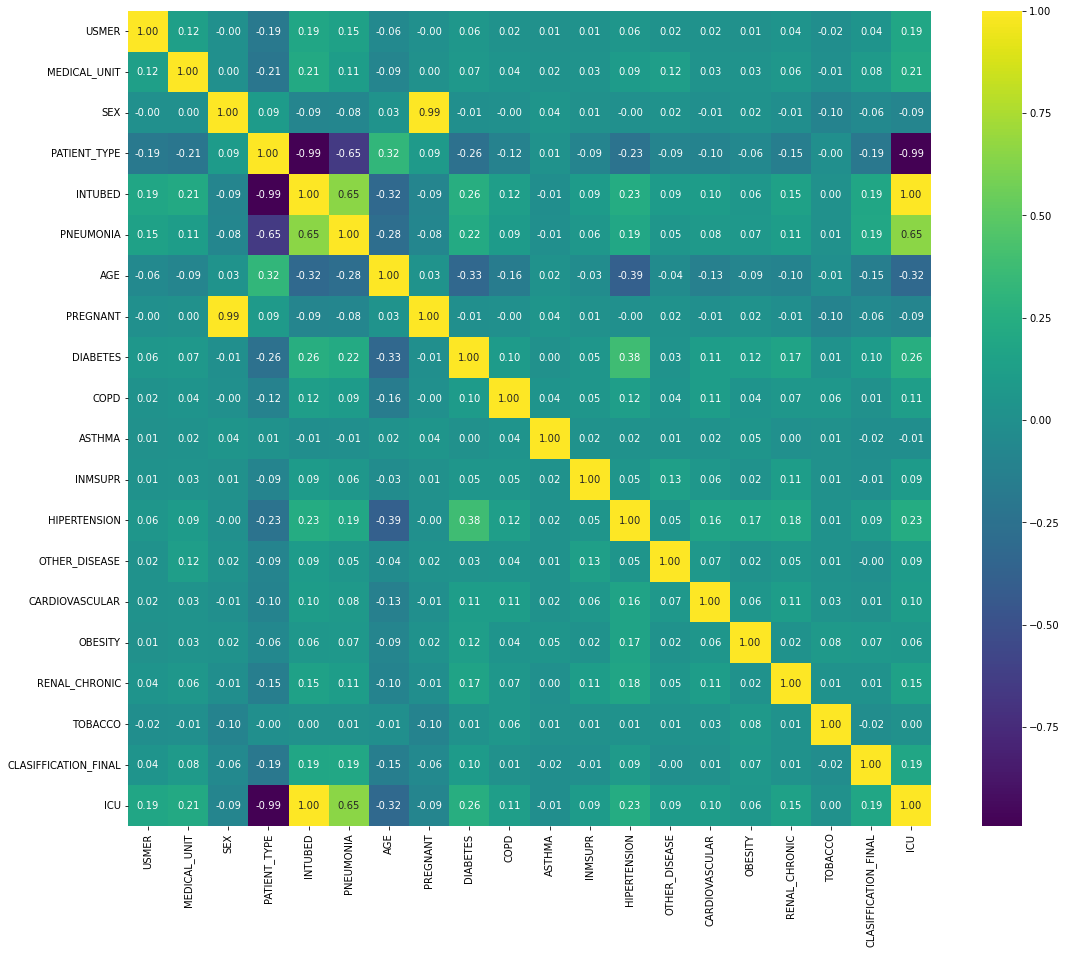

In [4]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True,cmap='viridis',fmt=".2f")

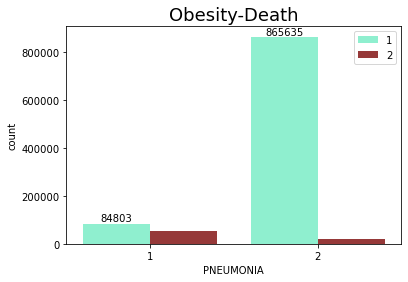

In [5]:
df["DEATH"] = [1 if each=="9999-99-99" else 2 for each in df.DATE_DIED]
ax=sns.countplot(df.PNEUMONIA,hue=df.DEATH, palette=sns.color_palette(["#7fffd4","#a52a2a"]))
plt.title("Obesity-Death",fontsize=18, color="black")
plt.bar_label(ax.containers[0])
plt.legend(loc="best");

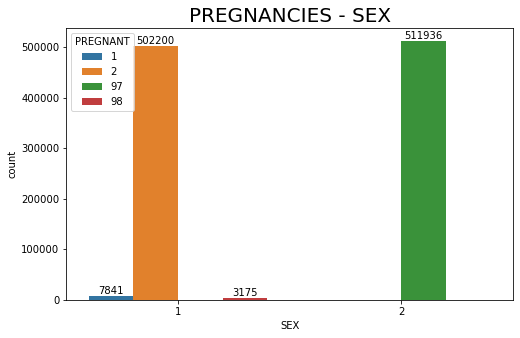

In [6]:
plt.figure(figsize = (8,5))
ax = sns.countplot(df.SEX, hue = df.PREGNANT)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("PREGNANCIES - SEX", fontsize = 20);

**In pregnancies, 98 means null values for female and 97 means null values for males. We will convert 97 to 2 because men can't birth.**

In [7]:
df.PREGNANT = df.PREGNANT.replace({98:2,97:2})



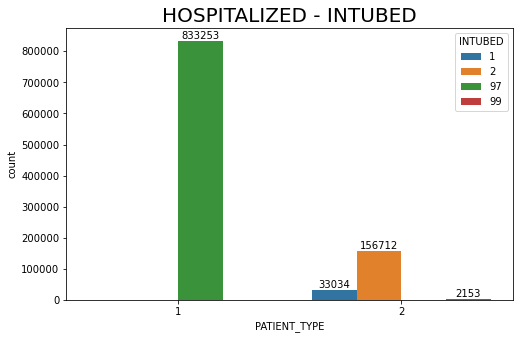

In [8]:
plt.figure(figsize = (8,5))
ax = sns.countplot(df.PATIENT_TYPE, hue = df.INTUBED)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("HOSPITALIZED - INTUBED", fontsize = 20);

**INTUBED Variable has so many null values. We delete it.**

In [9]:
df.drop("INTUBED", axis = 1, inplace = True)
df.drop("ICU", axis = 1, inplace = True)

In [123]:
df.CLASIFFICATION_FINAL.value_counts()

7    490123
3    378629
6    117756
5     25305
1      8448
4      3090
2      1801
Name: CLASIFFICATION_FINAL, dtype: int64

**1-2-3 means COVID and 4-5-6-7 means not COVID. 

In [10]:
df.CLASIFFICATION_FINAL = df.CLASIFFICATION_FINAL.replace([1,2,3], 1)
df.CLASIFFICATION_FINAL = df.CLASIFFICATION_FINAL.replace([4,5,6,7], 2)

In [10]:
df.CLASIFFICATION_FINAL.value_counts()

2    636274
1    388878
Name: CLASIFFICATION_FINAL, dtype: int64

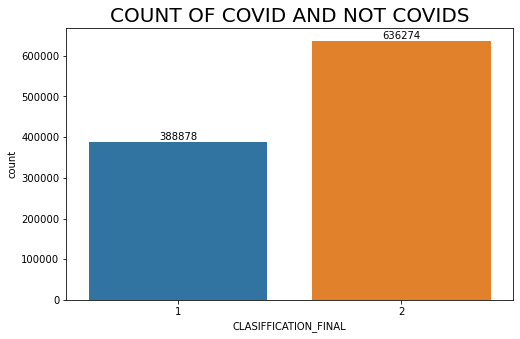

In [11]:
plt.figure(figsize = (8,5))
ax = sns.countplot(df.CLASIFFICATION_FINAL)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("COUNT OF COVID AND NOT COVIDS", fontsize = 20);

**We will make a variable that shows us die date. So if we do anything with these dates, it means they are dead numbers.**

In [12]:
df["MONTH"],df["YEAR"] = df.DATE_DIED.str.split("/", expand = True)[1],df.DATE_DIED.str.split("/", expand = True)[2]


In [130]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH,MONTH,YEAR
0,2,1,1,1,03/05/2020,1,65,2,2,2,...,1,2,2,2,2,2,1,1,05,2020
1,2,1,2,1,03/06/2020,1,72,2,2,2,...,1,2,2,1,1,2,2,1,06,2020
2,2,1,2,2,09/06/2020,2,55,2,1,2,...,2,2,2,2,2,2,1,1,06,2020
3,2,1,1,1,12/06/2020,2,53,2,2,2,...,2,2,2,2,2,2,2,1,06,2020
4,2,1,2,1,21/06/2020,2,68,2,1,2,...,1,2,2,2,2,2,1,1,06,2020


In [131]:
df.YEAR.value_counts()

2020    74402
2021      312
Name: YEAR, dtype: int64

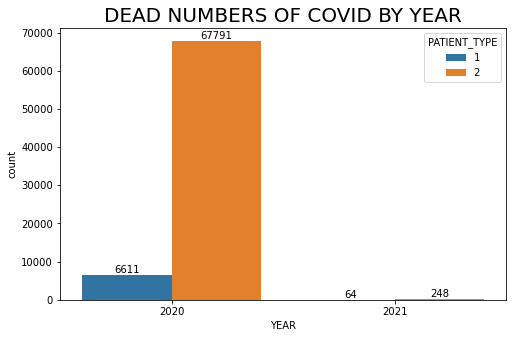

In [13]:
plt.figure(figsize = (8,5))
ax = sns.countplot(x = "YEAR", hue = "PATIENT_TYPE", data = df)
plt.title("DEAD NUMBERS OF COVID BY YEAR", fontsize = 20)
for bars in ax.containers:
    ax.bar_label(bars)

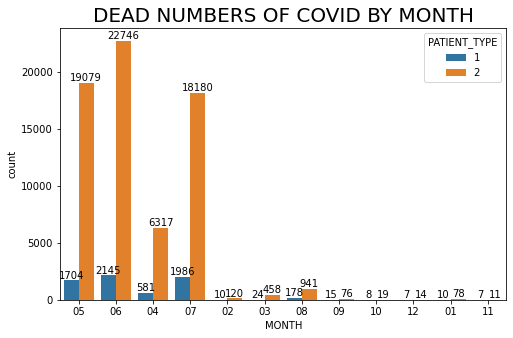

In [14]:
plt.figure(figsize = (8,5))
ax = sns.countplot(x = "MONTH", hue = "PATIENT_TYPE", data = df)
plt.title("DEAD NUMBERS OF COVID BY MONTH", fontsize = 20)
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
df.drop(["DATE_DIED", "MONTH", "YEAR"], axis = 1, inplace = True)

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)
    train_errors, val_errors = [], []
    for m in range(2, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend()
    plt.show()

In [18]:
df["CLASIFFICATION_FINAL"] = df["CLASIFFICATION_FINAL"] - 1



In [19]:
x = df.drop("CLASIFFICATION_FINAL", axis = 1)
y = df["CLASIFFICATION_FINAL"]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, classification_report, plot_confusion_matrix
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


In [18]:
conda update -c conda-forge scikit-learn


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: scikit-learn


<AxesSubplot:xlabel='CLASIFFICATION_FINAL', ylabel='count'>

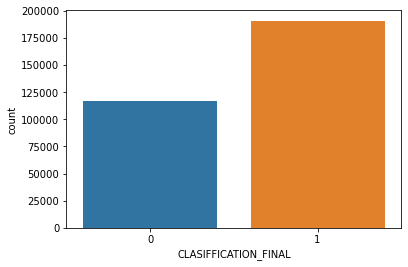

In [25]:
sns.countplot(y_test)

<AxesSubplot:xlabel='CLASIFFICATION_FINAL', ylabel='count'>

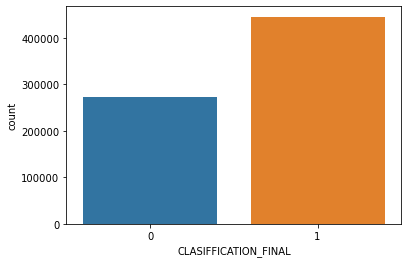

In [26]:
sns.countplot(y_train)

In [18]:
a = y_train.value_counts()[1]
b =  y_train.value_counts()[0]
c = y_test.value_counts()[1]
d =  y_test.value_counts()[0]
print(d/c,b/a)

0.6127300090718881 0.6105167480222184


In [22]:
af =  df.copy()
af = af.iloc[:20000,:]
x1 = af.drop("CLASIFFICATION_FINAL", axis = 1)
y1 = af["CLASIFFICATION_FINAL"]
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1, y1, test_size = 0.3, random_state = 0)
x_test1.shape

(6000, 18)

In [23]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train1, y_train1)
pred_log = log_reg.predict(x_test1)
print("Logistic regreession's Accuracy is "+str(accuracy_score(pred_log, y_test1)))
print("Logistic regreession's AUC score is "+str(roc_auc_score(pred_log, y_test1)))
# NOW TRY SOFTMAX LOGSITIC REGRESSION
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=30)
softmax_reg.fit(x_train1, y_train1)
pred_log1 = softmax_reg.predict(x_test1)
print("Logistic regreession softmax's Accuracy is "+str(accuracy_score(pred_log1, y_test1)))
print("Logistic regreession softmax's AUC score is "+str(roc_auc_score(pred_log1, y_test1)))


Logistic regreession's Accuracy is 0.6168333333333333
Logistic regreession's AUC score is 0.619368376721318
Logistic regreession softmax's Accuracy is 0.6181666666666666
Logistic regreession softmax's AUC score is 0.6219946284157469


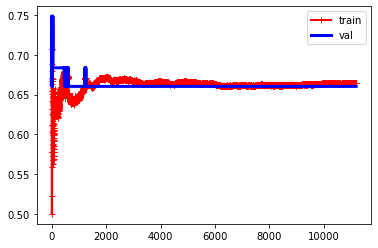

In [41]:
plot_learning_curves(LogisticRegression(), x_train1, y_train1)


In [24]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train1, y_train1)
pred_svc =  svc.predict(x_test1)
print("svc's Accuracy is "+str(accuracy_score(pred_svc, y_test1)))
print("svc's AUC score is "+str(roc_auc_score(pred_svc, y_test1)))


svc's Accuracy is 0.6091666666666666
svc's AUC score is 0.6270109729604934


In [74]:
param_grid = {'C': [0.1,1,10], 'gamma': [0.1,0.01,0.01],'kernel': [ 'rbf']}
grid = GridSearchCV(svc,param_grid,refit=True,verbose=2)
grid.fit(x_train1,y_train1)
print(grid.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  12.4s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  11.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  14.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  12.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  11.9s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  11.9s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  11.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  11.3s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  11.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  10.9s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  10.9s
[CV] END ......................C=0.1, gamma=0.01,

In [75]:
from sklearn.svm import SVC
svc = SVC(C=1, gamma=0.1, kernel='rbf')
svc.fit(x_train1, y_train1)
pred_svc =  svc.predict(x_test1)
print("best of sv's Accuracy is "+str(accuracy_score(pred_svc, y_test1)))
print("best of svm's AUC score is "+str(roc_auc_score(pred_svc, y_test1)))


best of sv's Accuracy is 0.6151666666666666
best of svm's AUC score is 0.6274520847699397


In [ ]:
plot_learning_curves(SVC(C=1, gamma=0.1, kernel='rbf'), x_train1, y_train1)


0.6081666666666666
0.5938333333333333
0.6128333333333333


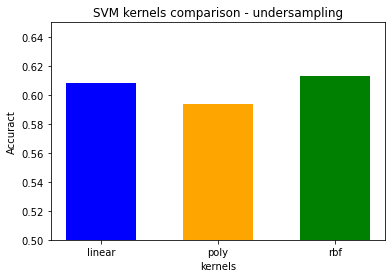

In [143]:
from sklearn.metrics import f1_score
from sklearn.svm import SVC
kernels = ["linear", "poly", "rbf"]
svm_fmeasures = {}
svm_best_result = 0
for kernel in kernels:
    # create a SVM classifier instance and compute the prediction
    svm_classifier = SVC(kernel=kernel,degree = 8, class_weight='balanced')
    svm_classifier.fit(x_train1, y_train1)
    y_pred = svm_classifier.predict(x_test1)
    print(accuracy_score(y_pred,y_test1))

    # calculate F-measures and save best model
    svm_fmeasures[kernel] = accuracy_score(y_pred, y_test1)
    if svm_fmeasures[kernel] > svm_best_result:
        svm_best_result = svm_fmeasures[kernel]
        svm_best_model = svm_classifier


plt.bar(svm_fmeasures.keys(), svm_fmeasures.values(), color=['blue', 'orange', 'green', 'red'], width=.6)
plt.title('SVM kernels comparison - undersampling')
plt.xlabel('kernels')
plt.ylabel('Accuray')
plt.ylim(0.5, 0.65)
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(max_depth=2, random_state=5)
rnd_clf.fit(x_train1, y_train1)
pred_rand_tree =  rnd_clf.predict(x_test1)
print("random forest's Accuracy is "+str(accuracy_score(pred_rand_tree, y_test1)))
print("random forest's AUC score is "+str(roc_auc_score(pred_rand_tree, y_test1)))


Logistic regreession softmax's Accuracy is 0.6096666666666667


In [18]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x_train1, y_train1)
pred_tree =  tree_clf.predict(x_test1)
print("Decision tree's Accuracy is "+str(accuracy_score(pred_tree, y_test1)))
print("Decision tree's AUC score is "+str(roc_auc_score(pred_tree, y_test1)))


Logistic regreession softmax's Accuracy is 0.6168333333333333


In [82]:
from sklearn.neighbors import KNeighborsClassifier
kneigh = KNeighborsClassifier(n_neighbors=200)
kneigh.fit(x_train1, y_train1)
pred_tree =  kneigh.predict(x_test1)
print("KNN's Accuracy is "+str(accuracy_score(pred_tree, y_test1)))
print("KNN's AUC score is "+str(roc_auc_score(pred_tree, y_test1)))

KNN's Accuracy is 0.5983333333333334
KNN's AUC score is 0.6008765738232588


In [20]:
from sklearn.model_selection import GridSearchCV


grid_values = {'n_estimators': [10, 30, 50, 100],
               'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
               'max_depth' : [4,5,6,7,8],
              }
grid_search_rfc = GridSearchCV(rnd_clf, param_grid = grid_values, scoring = 'accuracy')
grid_search_rfc.fit(x_train1, y_train1)
grid_search_rfc.best_params_

{'max_depth': 6, 'max_features': 0.5, 'n_estimators': 50}

In [26]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(max_depth=6, random_state=5,n_estimators = 50, max_features = 0.5)
rnd_clf.fit(x_train1, y_train1)
pred_rand_tree =  rnd_clf.predict(x_test1)
print("random forest's Accuracy is "+str(accuracy_score(pred_rand_tree, y_test1)))
print("random forest's is "+str(roc_auc_score(pred_rand_tree, y_test1)))b

random forest's Accuracy is 0.6361666666666667
random forest's is 0.6427252063326122


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(tree_clf, params, verbose=1, cv=3)
grid_search_cv.fit(x_train1, y_train1)
grid_search_cv.best_params_

Fitting 3 folds for each of 294 candidates, totalling 882 fits


{'max_leaf_nodes': 70, 'min_samples_split': 2}

In [35]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_leaf_nodes=70,min_samples_split = 2)
tree_clf.fit(x_train1, y_train1)
pred_tree =  tree_clf.predict(x_test1)
print("Decision tree's Accuracy is "+str(accuracy_score(pred_tree, y_test1)))
print("Decision tree's AUC score is "+str(roc_auc_score(pred_tree, y_test1)))


Decision tree's Accuracy is 0.6268333333333334
Decision tree's AUC score is 0.6265572708789839


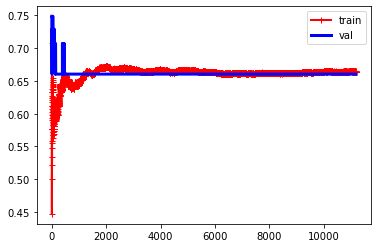

In [42]:
plot_learning_curves(DecisionTreeClassifier(max_leaf_nodes=70,min_samples_split = 2), x_train1, y_train1)

In [35]:

from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(kneigh, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(x_train1, y_train1)
grid_search.best_params_

Fitting 10 folds for each of 30 candidates, totalling 300 fits


{'n_neighbors': 27}

In [90]:
from sklearn.neighbors import KNeighborsClassifier
kneigh = KNeighborsClassifier(n_neighbors=27)
kneigh.fit(x_train1, y_train1)
pred_tree =  kneigh.predict(x_test1)
print("knn's Accuracy is "+str(accuracy_score(pred_tree, y_test1)))
print("knn's roc auc score is "+str(accuracy_score(pred_tree, y_test1)))

knn's Accuracy is 0.6051666666666666
knn's roc auc score is 0.6051666666666666


In [ ]:
plot_learning_curves(KNeighborsClassifier(n_neighbors=27), x_train1, y_train1)

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression



voting_clf = VotingClassifier(
estimators=[('s_lg', log_reg), ('tr', tree_clf)],
voting='soft')
voting_clf.fit(x_train1, y_train1)
from sklearn.metrics import accuracy_score

for clf in (log_reg, tree_clf, voting_clf):
    clf.fit(x_train1, y_train1)
    y_pred = clf.predict(x_test1)
    print(clf.__class__.__name__, accuracy_score(y_test1, y_pred))


LogisticRegression 0.617
DecisionTreeClassifier 0.6268333333333334
VotingClassifier 0.629


In [36]:
#BAGGING TIME!
from sklearn.ensemble import BaggingClassifier
'''
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500,
max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(x_train, y_train)
y_pred_bag = bag_clf.predict(x_test)'''


#print("Logistic regreession softmax's Accuracy is "+str(accuracy_score(y_pred_bag, y_test)))
#print("Logistic regreession softmax's AUC score is "+str(roc_auc_score(y_pred_bag, y_test)))

a = RandomForestClassifier(max_depth=6, random_state=5,n_estimators = 50, max_features = 0.5)
b = DecisionTreeClassifier(max_depth=6,max_features = 0.5)

for clf in (a, b):
    bag_clf = BaggingClassifier(
    clf, n_estimators=100,
    max_samples=10000, bootstrap=True, n_jobs=-1)
    bag_clf.fit(x_train1, y_train1)
    y_pred_bag = bag_clf.predict(x_test1)


    print(str(accuracy_score(y_pred_bag, y_test1)))
    print(str(roc_auc_score(y_pred_bag, y_test1)))

0.6325
0.6410714075775975
0.6343333333333333
0.6415162832631011


## Checking Recall

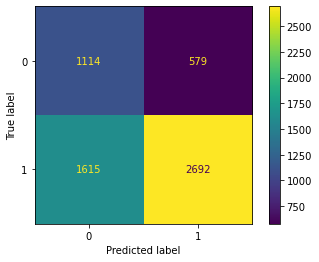

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix(y_pred_bag, y_test1))
disp = disp.plot()

# FEATURE IMPORTANCES

In [38]:
df_importances = pd.DataFrame(list(x), rnd_clf.feature_importances_)
df_importances.columns = ["Feature_Names"]
df_importances["Importances"] = df_importances.index
df_importances = df_importances.sort_values(by = "Importances", ascending = False)
df_importances.index = np.arange(0,len(df_importances))

In [39]:
df_importances

,Feature_Names,Importances
0,PNEUMONIA,0.329333
1,AGE,0.183106
2,MEDICAL_UNIT,0.151213
3,PATIENT_TYPE,0.094549
4,DEATH,0.070930
5,OBESITY,0.041384
6,USMER,0.032859
7,SEX,0.015483
8,INMSUPR,0.015160
9,OTHER_DISEASE,0.012914


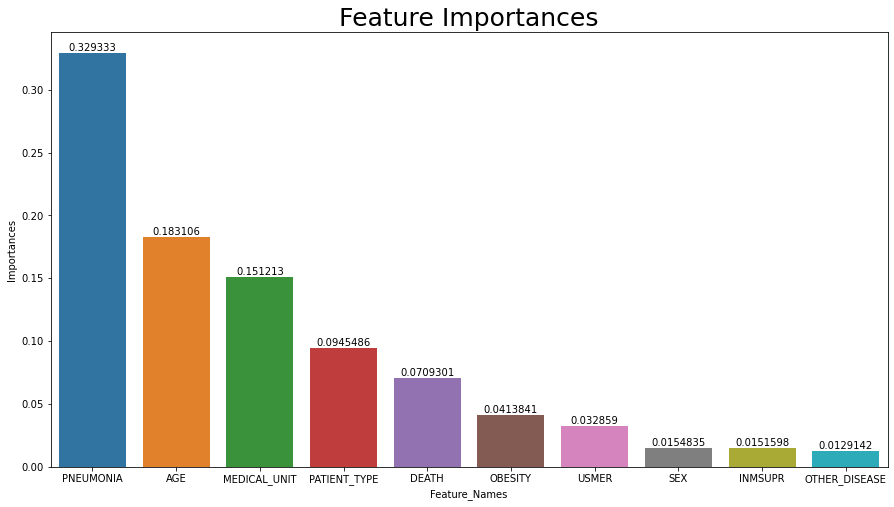

In [40]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x = "Feature_Names", y = "Importances", data = df_importances.sort_values(
    by = "Importances", ascending=False)[0:10])
plt.title("Feature Importances", fontsize = 25)
for bars in ax.containers:
    ax.bar_label(bars)

In [88]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [93]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        plt.figure(figsize=(12,6))
        labels = ["1", "2", "3", "4", "5","6","7","8","9","10"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.4, 0.7)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

In [111]:
decision_tree_result = cross_validation(bag_clf, x_train1, y_train1, 10)
print(decision_tree_result)

{'Training Accuracy scores': array([0.63925926, 0.64290123, 0.64117284, 0.64209877, 0.64203704,
       0.6417284 , 0.64160494, 0.64209877, 0.64253086, 0.64222222]), 'Mean Training Accuracy': 64.17654320987654, 'Training Precision scores': array([0.6320186 , 0.63579496, 0.63325877, 0.63412322, 0.63443926,
       0.63486414, 0.63184713, 0.63347912, 0.63603069, 0.63565891]), 'Mean Training Precision': 0.6341514818991675, 'Training Recall scores': array([0.82368126, 0.82123218, 0.82605768, 0.82583324, 0.82403771,
       0.82067108, 0.83492313, 0.82897542, 0.81853888, 0.81898777]), 'Mean Training Recall': 0.8242938354983395, 'Training F1 scores': array([0.71523243, 0.71671319, 0.71692233, 0.7173913 , 0.71691482,
       0.71590798, 0.71932708, 0.71816061, 0.71583493, 0.71577089]), 'Mean Training F1 Score': 0.7168175553579028, 'Validation Accuracy scores': array([0.65111111, 0.61611111, 0.64111111, 0.63      , 0.63555556,
       0.62055556, 0.62833333, 0.62388889, 0.63277778, 0.64277778]), 'M

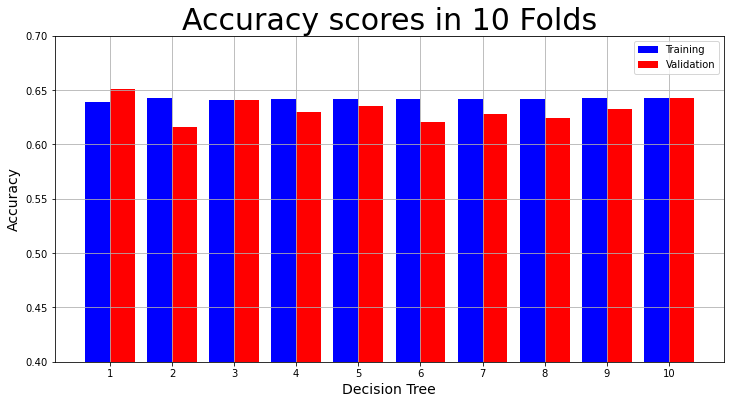

In [112]:
model_name = "Decision Tree"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 10 Folds",
            decision_tree_result["Training Accuracy scores"],
            decision_tree_result["Validation Accuracy scores"])

In [56]:
aa = np.arange(0.1,1,0.05)
aa
for ii in aa:
    x_train1,x_test1,y_train1,y_test1 = train_test_split(x1, y1, test_size = ii,random_state = 0)

    rnd_clf = RandomForestClassifier(max_depth=6, random_state=5,n_estimators = 50, max_features = 0.5)
    rnd_clf.fit(x_train1, y_train1)
    pred_rand_tree =  rnd_clf.predict(x_test1)
    print("shape " + str(x_test1.shape[0]) + " test-size: "+str(ii)+" random forest's Accuracy is "+str(accuracy_score(pred_rand_tree, y_test1)))
    print("test-size: "+str(ii)+" random forest's roc is "+str(roc_auc_score(pred_rand_tree, y_test1)))
    

shape 2000 test-size: 0.1 random forest's Accuracy is 0.635
test-size: 0.1 random forest's roc is 0.6434027777777778
shape 3001 test-size: 0.15000000000000002 random forest's Accuracy is 0.6394535154948351
test-size: 0.15000000000000002 random forest's roc is 0.646987597599563
shape 4001 test-size: 0.20000000000000004 random forest's Accuracy is 0.6398400399900025
test-size: 0.20000000000000004 random forest's roc is 0.648913910563813
shape 5001 test-size: 0.25000000000000006 random forest's Accuracy is 0.6374725054989002
test-size: 0.25000000000000006 random forest's roc is 0.6438510649432204
shape 6001 test-size: 0.30000000000000004 random forest's Accuracy is 0.6325612397933678
test-size: 0.30000000000000004 random forest's roc is 0.6381771429622125
shape 7001 test-size: 0.3500000000000001 random forest's Accuracy is 0.6356234823596629
test-size: 0.3500000000000001 random forest's roc is 0.6428496379485665
shape 8001 test-size: 0.40000000000000013 random forest's Accuracy is 0.63267

In [57]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1, y1, test_size = 0.1,random_state = 0)
rnd_clf = RandomForestClassifier(max_depth=6, random_state=5,n_estimators = 50, max_features = 0.5)
rnd_clf.fit(x_train1, y_train1)
pred_rand_tree =  rnd_clf.predict(x_test1)
print("random forest's Accuracy is "+str(accuracy_score(pred_rand_tree, y_test1)))
print("random forest's roc is "+str(roc_auc_score(pred_rand_tree, y_test1)))


random forest's Accuracy is 0.635
random forest's roc is 0.6434027777777778


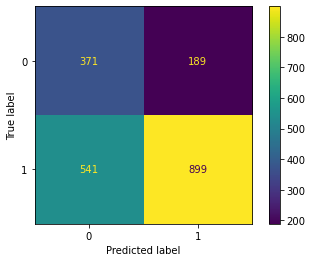

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix(pred_rand_tree, y_test1))
disp = disp.plot()

In [168]:
aa = np.arange(0.0005,1,0.05)
aa
for ii in aa:
    x_train1,x_test1,y_train1,y_test1 = train_test_split(x1, y1, test_size = ii,random_state = 0)

    b = DecisionTreeClassifier(max_depth=6,max_features = 0.5)
    b.fit(x_train1, y_train1)
    pred_rand_tree =  b.predict(x_test1)
    print("shape " + str(x_test1.shape[0]) + " test-size: "+str(ii)+"  desicion tree's Accuracy is "+str(accuracy_score(pred_rand_tree, y_test1)))
    print("test-size: "+str(ii)+" desicion tree's roc is "+str(roc_auc_score(pred_rand_tree, y_test1)))
    

shape 10 test-size: 0.0005  desicion tree's Accuracy is 0.6
test-size: 0.0005 desicion tree's roc is 0.625
shape 1011 test-size: 0.0505  desicion tree's Accuracy is 0.6379821958456974
test-size: 0.0505 desicion tree's roc is 0.6448049040714844
shape 2011 test-size: 0.1005  desicion tree's Accuracy is 0.6200895077076082
test-size: 0.1005 desicion tree's roc is 0.6312167986767185
shape 3011 test-size: 0.15050000000000002  desicion tree's Accuracy is 0.6313517103952175
test-size: 0.15050000000000002 desicion tree's roc is 0.6509471172634088
shape 4011 test-size: 0.2005  desicion tree's Accuracy is 0.6360009972575418
test-size: 0.2005 desicion tree's roc is 0.6414954858228141
shape 5010 test-size: 0.2505  desicion tree's Accuracy is 0.6369261477045908
test-size: 0.2505 desicion tree's roc is 0.6427023999259298
shape 6011 test-size: 0.30050000000000004  desicion tree's Accuracy is 0.6230244551655298
test-size: 0.30050000000000004 desicion tree's roc is 0.6225615102982877
shape 7011 test-siz

In [70]:
af.drop(["PATIENT_TYPE", "DEATH", "USMER","OBESITY","OTHER_DISEASE","INMSUPR"], axis = 1, inplace = True)
af.drop(["DIABETES", "ASTHMA", "COPD","HIPERTENSION","CARDIOVASCULAR","TOBACCO"], axis = 1, inplace = True)


In [71]:
x1 = af.drop("CLASIFFICATION_FINAL", axis = 1)
y1 = af["CLASIFFICATION_FINAL"]
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1, y1, test_size = 0.3, random_state = 0)

rnd_clf = RandomForestClassifier(max_depth=6, random_state=5,n_estimators = 50, max_features = 0.5)
rnd_clf.fit(x_train1, y_train1)
pred_rand_tree =  rnd_clf.predict(x_test1)
print("random forest's Accuracy is "+str(accuracy_score(pred_rand_tree, y_test1)))
print("random forest's roc is "+str(roc_auc_score(pred_rand_tree, y_test1)))


random forest's Accuracy is 0.6173333333333333
random forest's roc is 0.6349723399155354


In [68]:
af

,MEDICAL_UNIT,SEX,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,CARDIOVASCULAR,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,1,1,1,65,2,2,2,2,1,2,2,2,-1
1,1,2,1,72,2,2,2,2,1,2,1,2,0
2,1,2,2,55,2,1,2,2,2,2,2,2,-1
3,1,1,2,53,2,2,2,2,2,2,2,2,0
4,1,2,2,68,2,1,2,2,1,2,2,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20883,4,1,2,61,2,1,2,2,1,2,2,2,0
20884,4,2,1,62,2,2,2,2,1,1,2,2,0
20885,4,2,1,53,2,1,2,2,1,2,2,2,0
20886,4,1,1,56,2,2,2,2,2,2,2,2,0


In [185]:
pip install -U scikit-learn --user

Note: you may need to restart the kernel to use updated packages.


What changed after end-term:
 1) Trained every classification model without error
 2) Used voting classifier increased accuracy by 0.2-0.3 comparitevly with other models
 3) Deleted all unimportnant features and check its accuracy with random forest, however its decreased
 4) Used K-fold cross validation method with training and validation
 5) Showed it with visualization
 6) Tried different slices with random forest (increased to 6.35 accuracy, increased to 6.45 roc auc score)
 7) Showed it with confusion matrix
 8) Showed training and validation learning curves with visualization for 3 models(Decision Tree, Random forest, Linear regression, KNN)
 9) Checked accuracy and roc auc score between rbf, linear ,poly,gamma svm models correctly
 10) Got that Decision tree with bagging(0.63433) and Random Forest Tree with the best parametres(Grid Search) 0.636 showed the best accuacy and roc auc score
 11) The are more 1 000 000  rows,so I left 20 000 rows which was reason for only 0.636 accuacy. With 1 Million rows I waited for 1 hour to inplement svm,knn.
